In [21]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')

In [22]:
data = pd.read_csv('../output/model_data.csv',parse_dates=['ActivityDate'])

data

,Id,ActivityDate,TotalSteps,LogTotalSteps,Day,NoExercise
0,1503960366,2016-03-25,11004,9.306105,4,0
1,1503960366,2016-03-26,17609,9.776222,5,0
2,1503960366,2016-03-27,12736,9.452266,6,0
3,1503960366,2016-03-28,13231,9.490393,0,0
4,1503960366,2016-03-29,12041,9.396156,1,0
...,...,...,...,...,...,...
410,8877689391,2016-04-08,23014,10.043901,4,0
411,8877689391,2016-04-09,16470,9.709357,5,0
412,8877689391,2016-04-10,28497,10.257589,6,0
413,8877689391,2016-04-11,10622,9.270777,0,0


In [23]:
X = data.drop(columns=['Id','ActivityDate','LogTotalSteps','Day']).values
y = data['Day'].values

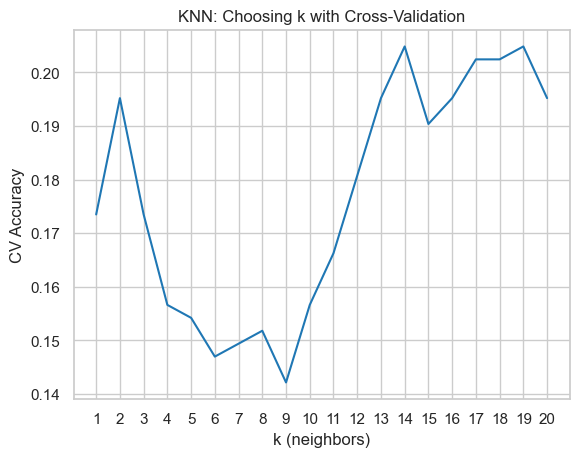

In [24]:
k_range = range(1,21)

cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,X,y,cv=5)
    cv_scores.append(score.mean())

k_range_cv_scores = pd.DataFrame({'k_range': k_range,'cv_scores':cv_scores}).sort_values('cv_scores',ascending=False).reset_index(drop=True)

k_best = k_range_cv_scores.loc[0,'k_range']

plt.plot(k_range, cv_scores)
plt.xticks(range(1,21))
plt.xlabel('k (neighbors)')
plt.ylabel('CV Accuracy')
plt.title('KNN: Choosing k with Cross-Validation')
plt.grid(True)
plt.show()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [26]:
knn = KNeighborsClassifier(n_neighbors=k_best)
knn.fit(X_train,y_train)
knn.predict(X_test)

array([5, 0, 5, 3, 6, 6, 6, 5, 2, 0, 6, 4, 5, 5, 5, 0, 0, 0, 6, 4, 5, 6,
       3, 2, 5, 5, 0, 6, 0, 6, 5, 5, 2, 1, 5, 0, 0, 5, 1, 4, 0, 2, 5, 5,
       6, 2, 5, 6, 5, 5, 5, 0, 0, 4, 0, 6, 5, 5, 5, 5, 6, 0, 2, 5, 5, 0,
       0, 5, 5, 3, 5, 6, 0, 5, 1, 1, 6, 5, 0, 3, 1, 5, 4])